#### TELEPERFORMANCE (TP) - Prueba Técnica - Científico de Datos  (Por: Andrés Felipe Escallón Portilla,  22-24 / Feb / 2021)


# CASO DE CONSULTORIA 

###### **Requerimiento:**

Una de las operaciones de cobranzas de la compañía quiere generar estrategias diferenciadas para el proceso de gestión de recuperación de cartera de clientes de acuerdo con el riesgo de no pago de la primera factura.

La estrategia se divide en 3 grupos de intervención:

1. Alto riesgo: Llamarlos al 5 día de mora.
2. Medio riesgo: Enviar mensaje de texto al 5 día de mora.
3. Bajo riesgo: Enviar mensaje de texto al día 15 de mora.

Los costos por cada tipo de contacto son los siguientes:

- Llamada asesor de cobranza 1700 pesos
- Mensaje de texto 40 pesos

#### **Instrucciones**

1. Muestre un análisis descriptivo y/o diagnóstico inicial de la información insumo para el modelo.
2. Construya un modelo estadístico que calcule la probabilidad de que un cliente no pague la primera factura. Explique por qué escogió las variables con las que va a trabajar y si debió hacer modificaciones de estas.
3. Defina los puntos de corte que determinen a que grupo de estrategia pertenece cada cliente.
4. Describa el perfil de los clientes con un alto riesgo de no pago.
5. ¿Qué sugerencias haría usted al equipo de cobranzas de acuerdo con el análisis de la información del modelo?
6. Explique el modelo y sustente su validez estadística, así como los puntos de corte, la cantidad de clientes que pertenecen a cada estrategia, los perfiles de riesgo y sus sugerencias y conclusiones.
7. Adjunte la base de datos con la probabilidad de riesgo de cada cliente.

Todos los puntos anteriores deben evidenciarse en un notebook de Python o un Markdown de R que se deben compartir a través de GitHub.


# Solución del Caso:
Responderé a este caso en Español aclarando que lo ideal hubiese sido hacerlo en Inglés (algunos comentarios si están en Inglés).

1. **Muestre un análisis descriptivo y/o diagnóstico inicial de la información insumo para el modelo:**

#### Análisis de Datos Exploratorio (EDA):

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
!pip install -r '/content/drive/MyDrive/Teleperformance_PruebaTecnica_CientificoDatos/requirements.txt'

In [194]:
# Importing all the required packages

import pandas              as pd # The gold standard of Python data analysis, to create and manipulate tables of data
import numpy               as np # The Python module for processing arrays which/Pandas is based on
import seaborn             as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic
import branca
import geopandas

import matplotlib.pyplot   as plt # The gold standard of Python data visualization, but can be complex to use
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.widgets import Slider, Button, RadioButtons

import statsmodels.api as sm
import statsmodels.formula.api as sfm
from statsmodels.formula.api import ols

import scipy
from scipy import stats
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind, norm # A module for Python machine learning--we'll stick to T-Tests here

import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols

from IPython.display import display
from IPython.display import display_html
from IPython.display import Image, SVG

import folium # package for making maps, please make sure to use a version older than 1.0.0.
from folium.plugins import TimeSliderChoropleth
# from time_slider_choropleth import TimeSliderChoropleth

import json
import requests
from bs4 import BeautifulSoup
import os
import pydotplus
from io import StringIO
from sympy import var, plot_implicit, Eq
from graphviz import Source
from wordcloud import WordCloud # A package that will allow us to make a wordcloud

# when executing, the plot will be done
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,5)
import warnings
warnings.filterwarnings('ignore')
# ignore log(0) and divide by 0 warning
np.seterr(divide='ignore');

In [195]:
#leyendo los archivos de la base de datos (guardados previamente como csv) y asignándolos a dataframes:
df_var=pd.read_csv('/content/drive/MyDrive/Teleperformance_PruebaTecnica_CientificoDatos/data/base_de_datos_prueba_tecnica_csv_vars.csv')
df=pd.read_csv('/content/drive/MyDrive/Teleperformance_PruebaTecnica_CientificoDatos/data/base_de_datos_prueba_tecnica_csv_db.csv')

In [196]:
#visualizando los dataframes:
#Para una base de datos, las variables y su descripción es fundamental
df_var

,VARIABLE,DESCRIPCIÓN
0,REGIONAL,regional de instalación del servicio
1,DEPARTAMENTO,Departamento de instalación del servicio
2,TECNOL,Tipo de tecnología del servicio
3,GERENCIA,Gerencia de venta del servicio
4,CANAL_HOMOLOGADO_MILLICON,Canal de venta del servicio
5,tipo_fuerza_venta,Tipo de fuerza o equipo que realizó la venta
6,estrato,Estrato donde fue instalado el servicio
7,antiguedad_meses,Antigüedad del cliente al momento de solicitar...
8,productos,"Productos solicitados TV= televisión, TO=Telef..."
9,portafolio,cantidad de productos adquiridos


In [197]:
#visualizando la info completa de la DESCRIPCIÓN:
descripcion=[]
for row in range(len(df_var)): 
    descripcion.append(df_var['DESCRIPCIÓN'][row])
descripcion    

['regional de instalación del servicio',
 'Departamento de instalación del servicio',
 'Tipo de tecnología del servicio',
 'Gerencia de venta del servicio',
 'Canal de venta del servicio',
 'Tipo de fuerza o equipo que realizó la venta',
 'Estrato donde fue instalado el servicio',
 'Antigüedad del cliente al momento de solicitar el servicio',
 'Productos solicitados TV= televisión, TO=Telefonía, BA = Internet',
 'cantidad de productos adquiridos',
 'Servicios técnicos solicitados en los últimos 3 meses',
 'Tipo de fallo por elq ue solicitó el servicio técnico',
 'Si la variable asume el valor de 1 es que el cliente llamo a pedir una asesoría en factura',
 'Si la variable asume el valor de 1 es que el cliente llamo a hacer una petición queja o reclamo',
 'Si la variable asume el valor de 1 es que el cliente llamo a reagendar un servicio',
 'Si la variable asume el valor de 1 es que el cliente llamo a pedir una asesoría en el uso del servicio',
 'Si la variable asume el valor de 1 es que

In [198]:
#Esta es la base de datos como tal con la cual se va a trabajar:
pd.options.display.max_columns = None # para visualizar todas las columnas (variables) de interés
df

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
1,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
2,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,1,1.0,TV,Individual,1.0,No navega,0,0,0,0,0,0,0,0,0,1004371304
3,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867
4,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,NOROCCIDENTE,ANTIOQUIA,REDCO,CONTACT,IN BOUND,INDIRECTA,2,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,1,98589757
19938,NOROCCIDENTE,ANTIOQUIA,REDCO,CONTACT,IN BOUND,INDIRECTA,2,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,1,98589757
19939,NOROCCIDENTE,ANTIOQUIA,REDCO,TIENDAS,TIENDAS,INDIRECTA,2,89.0,BA,Individual,1.0,Sin señal,0,0,0,0,0,0,0,0,0,98590638
19940,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,2,36.0,TV,Individual,NaN,NaN,0,1,0,0,0,0,0,0,0,98591843


In [199]:
#Panorama general de los datos:
df.shape # (num_filas, num_cols)

(19942, 22)

In [200]:
list(df.columns)

['REGIONAL',
 'DEPARTAMENTO',
 'TECNOL',
 'GERENCIA',
 'CANAL_HOMOLOGADO_MILLICON',
 'tipo_fuerza_venta',
 'estrato',
 'antiguedad_meses',
 'productos',
 'portafolio',
 'no_serv_tecnicos',
 'fallo',
 'asesoria_factura',
 'pedidos_peticiones',
 'reagendamiento',
 'asesoria_servicios',
 'retencion',
 'Otras',
 'quejas_fraude',
 'traslado',
 'Incumplimiento_pago',
 'cliente_id']

¡Efectivamente son 22 columnas (variables) que ya se han mostrado anteriormente con su descripción, recordando que la **Variable objetivo** es `Incumplimiento_pago` (donde el 1 indica que el cliente no pago la primera factura)!

In [201]:
# Data types and amount of no-null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  object 
 7   antiguedad_meses           18264 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           6909 non-null   float64
 11  fallo                      6909 non-null   object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

Los registros de las variables numericas como `antiguedad_meses` y `no_serv_tecnicos` que no tienen información deben ser reemplazados por NaN

**(The most prudent option which will not alter subsequent summary statistics calculations and not skew the distribution of the non-missing data would be to replace all missing values with a standard NaN)**

Sin embargo, los registros sin información de la variable categórica `fallo` pueden reemplazarse por SE ("Sin Especificar"), similarmente a como lo tiene ya establecido la variable categórica `estrato`

In [202]:
# Another way to see null values per column
df.isnull().sum()

REGIONAL                         0
DEPARTAMENTO                     0
TECNOL                           0
GERENCIA                         0
CANAL_HOMOLOGADO_MILLICON        0
tipo_fuerza_venta                0
estrato                          0
antiguedad_meses              1678
productos                        0
portafolio                       0
no_serv_tecnicos             13033
fallo                        13033
asesoria_factura                 0
pedidos_peticiones               0
reagendamiento                   0
asesoria_servicios               0
retencion                        0
Otras                            0
quejas_fraude                    0
traslado                         0
Incumplimiento_pago              0
cliente_id                       0
dtype: int64

In [203]:
# Information about numerical columns (descriptive statistics)
df.describe()

,antiguedad_meses,no_serv_tecnicos,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
count,18264.000000,6909.0,19942.000000,19942.00000,19942.000000,19942.000000,19942.000000,19942.000000,19942.000000,19942.000000,19942.000000,1.994200e+04
mean,43.136060,1.0,0.056564,0.05185,0.022515,0.025975,0.013690,0.006168,0.025524,0.048240,0.143165,4.124402e+08
std,60.379264,0.0,0.231013,0.22173,0.148356,0.159066,0.116202,0.078295,0.157714,0.214278,0.350250,4.993182e+08
min,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.978700e+04
25%,4.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.225958e+07
50%,16.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.697511e+07
75%,52.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.036623e+09
max,337.000000,1.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.160082e+09


De la anterior tabla se concluye que **aproximadamente el 14% (exactamnente 14.3165%)** de los clientes (**aprox 2855 de 19942 clientes en total**) está incumpliendo el pago (no ha pagado la primera factura)

In [204]:
0.143165*19942

2854.9964299999997

In [205]:
# Information about categorical columns
df.describe(include = ['O'])

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,productos,portafolio,fallo
count,19942,19942,19942,19942,19942,19942,19942,19942,19942,6909
unique,6,22,4,6,11,2,7,7,3,20
top,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,2,TO+TV+BA,Trio,No navega
freq,11640,11655,15628,10075,4768,18893,6413,7933,7933,2845


In [206]:
df['fallo'].value_counts() #SE= Sin Especificar

No navega                         2845
Sin señal                         1307
Servicio intermitente             1238
No funciona línea telefónica       573
Mala calidad en la imagen          206
Navegacion Lenta                   184
Problemas Control Remoto           160
Falla Masiva                        76
Línea con ruido                     70
Problemas wifi                      67
Solicitud configuracion tecni       63
Fallas en audio/subtitulos          30
Problemas paquetes adicionales      23
No salen llamadas a X destino       20
Problemas con el portal             16
Problemas Servicios Especiales       9
Ingresa llamada de otra línea        9
Mala calidad en la voz               5
Problemas de correo remoto           5
Retención Clientes                   3
Name: fallo, dtype: int64

El fallo reportado mas común es "No navega".

In [207]:
#Contemos por ejemplo los fallos asociados a un tipo de tecnología por departamento:
df.groupby(["TECNOL","fallo","DEPARTAMENTO"])["DEPARTAMENTO"].count().reset_index(name="count").sort_values(by="count", ascending = False).reset_index(drop=True)

,TECNOL,fallo,DEPARTAMENTO,count
0,HFC,No navega,ANTIOQUIA,1222
1,HFC,Sin señal,ANTIOQUIA,694
2,REDCO,No navega,ANTIOQUIA,625
3,HFC,Servicio intermitente,ANTIOQUIA,569
4,HFC,No funciona línea telefónica,ANTIOQUIA,353
...,...,...,...,...
184,HFC,Problemas con el portal,SANTANDER,1
185,GPON,Línea con ruido,ANTIOQUIA,1
186,HFC,Problemas Control Remoto,ATLANTICO,1
187,GPON,Falla Masiva,ANTIOQUIA,1


In [208]:
#Generemos una tabla de contingencia entre las variables categoricas DEPARTAMENTO y fallo (permite una visualización de la distribución geográfica de los fallos):
pd.crosstab(df["DEPARTAMENTO"],df["fallo"])

fallo,Falla Masiva,Fallas en audio/subtitulos,Ingresa llamada de otra línea,Línea con ruido,Mala calidad en la imagen,Mala calidad en la voz,Navegacion Lenta,No funciona línea telefónica,No navega,No salen llamadas a X destino,Problemas Control Remoto,Problemas Servicios Especiales,Problemas con el portal,Problemas de correo remoto,Problemas paquetes adicionales,Problemas wifi,Retención Clientes,Servicio intermitente,Sin señal,Solicitud configuracion tecni
DEPARTAMENTO,,,,,,,,,,,,,,,,,,,,
ANTIOQUIA,44,14,9,56,141,5,124,476,1862,9,123,7,6,0,16,35,3,800,935,49
ATLANTICO,3,3,0,1,1,0,5,1,60,0,1,0,0,0,0,2,0,19,16,0
ATLÁNTICO,0,0,0,0,3,0,0,7,46,0,0,0,1,0,0,2,0,24,13,1
BOLIVAR,6,2,0,2,6,0,4,17,129,2,2,0,0,2,0,3,0,48,53,5
CALDAS,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
CAUCA,0,0,0,0,0,0,5,0,0,0,6,0,0,0,0,0,0,0,3,0
CESAR,0,0,0,0,3,0,6,3,31,0,0,0,0,0,0,2,0,9,18,0
CORDOBA,0,0,0,0,0,0,0,1,9,0,0,0,0,0,0,0,0,5,7,0
CUNDINAMARCA,12,0,0,8,13,0,11,24,333,2,10,0,4,0,3,5,0,125,102,6


In [209]:
#numerical variables
num_vars=list(df.describe().columns)
num_vars

['antiguedad_meses',
 'no_serv_tecnicos',
 'asesoria_factura',
 'pedidos_peticiones',
 'reagendamiento',
 'asesoria_servicios',
 'retencion',
 'Otras',
 'quejas_fraude',
 'traslado',
 'Incumplimiento_pago',
 'cliente_id']

In [210]:
#de las num_vars hay que remover cliente_id que no aporta al análisis pues es solo un dato para etiquetar a cada cliente con un número identificador:
num_vars=num_vars.copy()[:-1]
print(num_vars)

['antiguedad_meses', 'no_serv_tecnicos', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago']


In [211]:
#categorical variables
cat_vars=list(df.describe(include = ['O']).columns)
cat_vars

['REGIONAL',
 'DEPARTAMENTO',
 'TECNOL',
 'GERENCIA',
 'CANAL_HOMOLOGADO_MILLICON',
 'tipo_fuerza_venta',
 'estrato',
 'productos',
 'portafolio',
 'fallo']

In [212]:
# Unique values per column excluding null
df.nunique()

REGIONAL                         6
DEPARTAMENTO                    22
TECNOL                           4
GERENCIA                         6
CANAL_HOMOLOGADO_MILLICON       11
tipo_fuerza_venta                2
estrato                          7
antiguedad_meses               232
productos                        7
portafolio                       3
no_serv_tecnicos                 1
fallo                           20
asesoria_factura                 2
pedidos_peticiones               2
reagendamiento                   2
asesoria_servicios               2
retencion                        2
Otras                            2
quejas_fraude                    2
traslado                         2
Incumplimiento_pago              2
cliente_id                   12106
dtype: int64

In [213]:
# Unique values per column including null
df.nunique(dropna=False)

REGIONAL                         6
DEPARTAMENTO                    22
TECNOL                           4
GERENCIA                         6
CANAL_HOMOLOGADO_MILLICON       11
tipo_fuerza_venta                2
estrato                          7
antiguedad_meses               233
productos                        7
portafolio                       3
no_serv_tecnicos                 2
fallo                           21
asesoria_factura                 2
pedidos_peticiones               2
reagendamiento                   2
asesoria_servicios               2
retencion                        2
Otras                            2
quejas_fraude                    2
traslado                         2
Incumplimiento_pago              2
cliente_id                   12106
dtype: int64

### Generando algunas graficas estadísticas de algunas variables independientes (X) frente a la variable objetico o de interés (Y):

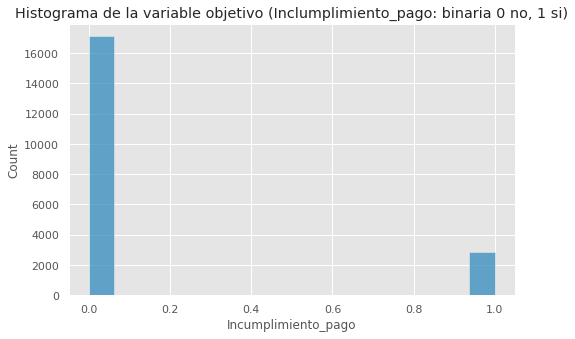

In [214]:
#plotting the histogram of the numerical variables:
sns.histplot(df[num_vars[10]])
plt.title('Histograma de la variable objetivo (Inclumplimiento_pago: binaria 0 no, 1 si)')
plt.show()

Con el anterior histograma se comprueba que el **14.3165% de los clientes (aprox 2855 de 19942 clientes en total** está incumpliendo el pago (no ha pagado la primera factura)

Now that we have looked at the variables of interest in isolation, it makes sense to look at them in relation to `Inclumplimiento_pago`:

Text(0.5, 1.0, 'Boxplot of Incumplimiento_pago vs. antiguedad_meses')

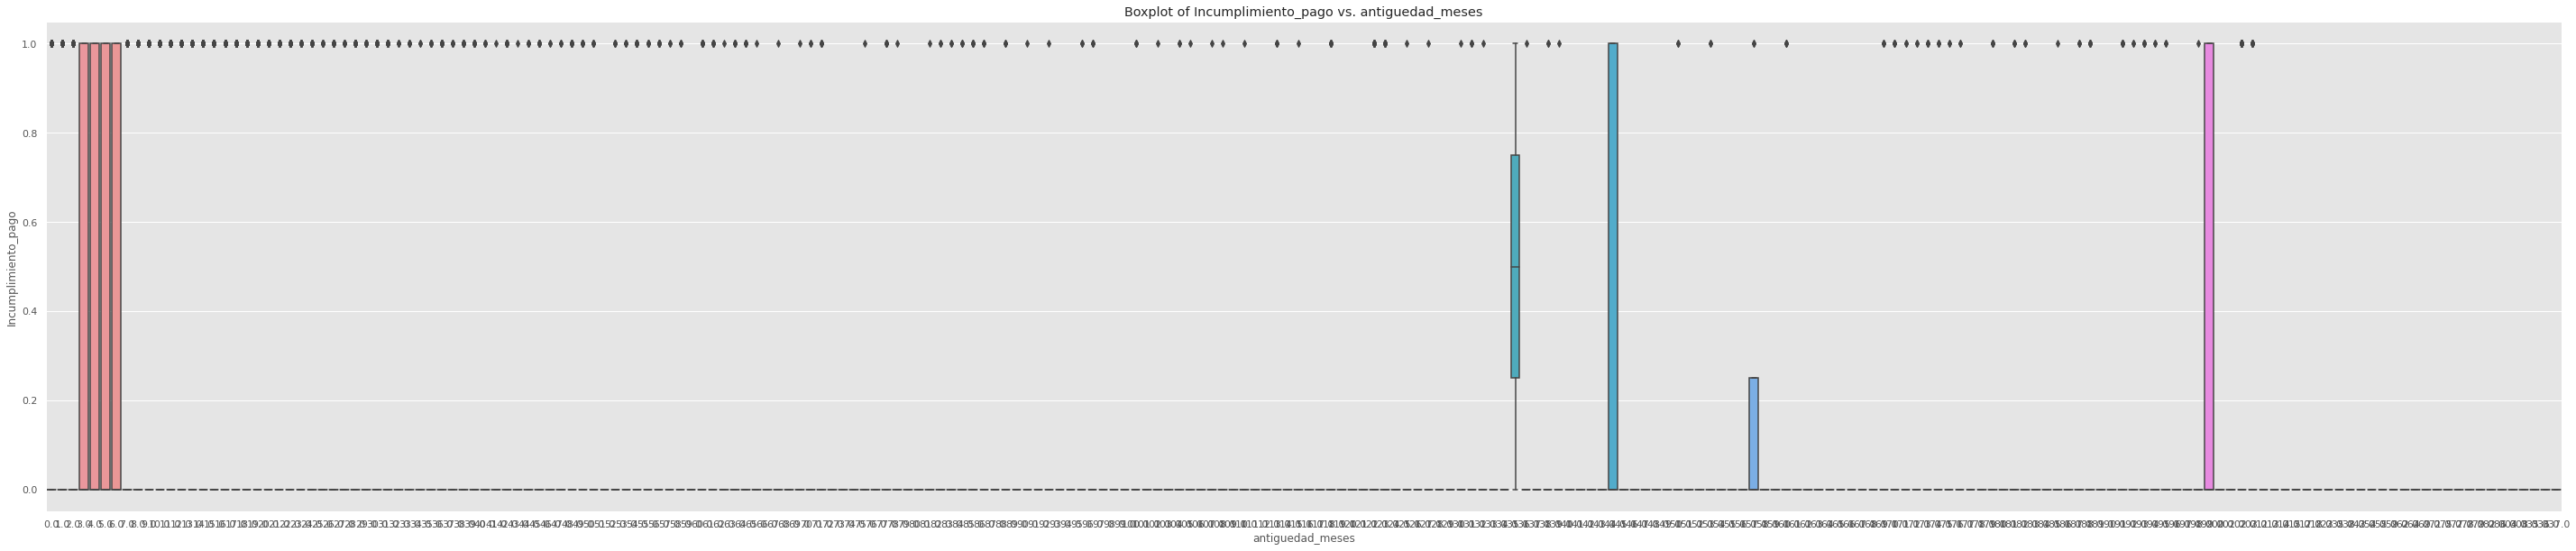

In [215]:
#Inspecting Inclumplimiento_pago against another variable of interest (e.g antiguedad_meses):
plt.figure(figsize=(50, 10))
sns.boxplot(x = num_vars[0], y=num_vars[10], data = df)
title_string = "Boxplot of " + num_vars[10] + " vs. " + num_vars[0]
plt.ylabel(num_vars[10])
plt.title(title_string)

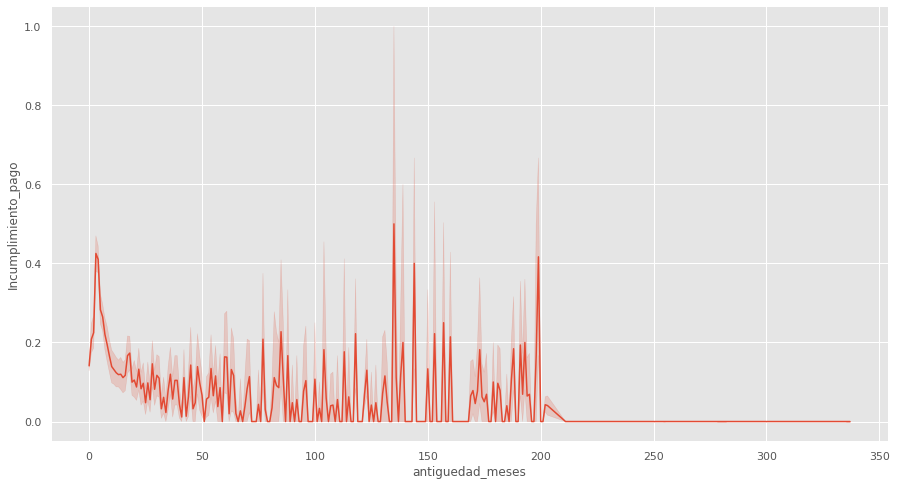

In [216]:
# We can look out for trends using a line plot 
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=num_vars[0],
    y=num_vars[10],
    data=df,
)

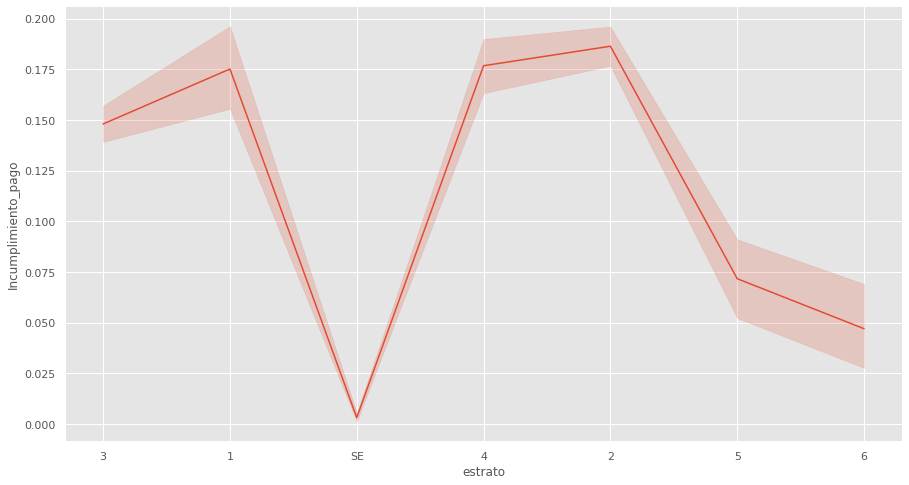

In [217]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=cat_vars[6],
    y=num_vars[10],
    data=df,
)

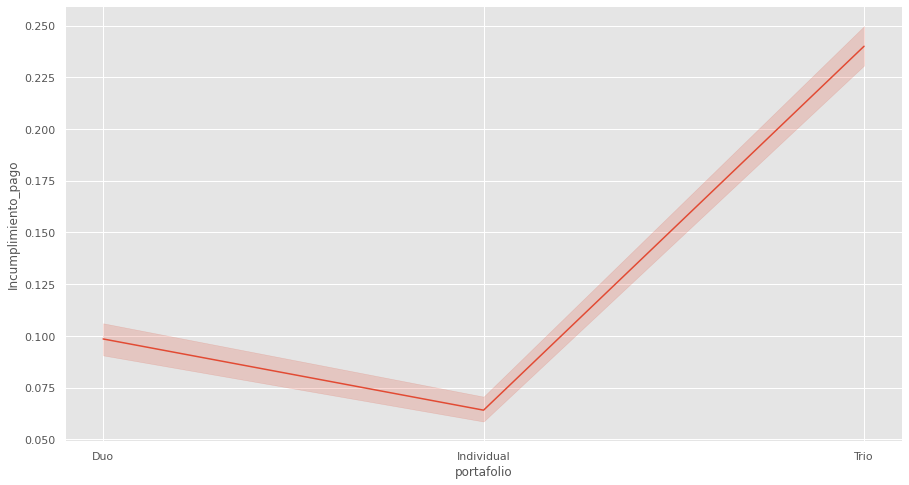

In [218]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=cat_vars[8],
    y=num_vars[10],
    data=df,
)

## Pre-processing our data

Now that we have an idea of what our dataset consists of, let's transform it so that we can display phase. The types of activities we may engage in during **pre-processing** include:

1. **Deleting columns**
2. **Enriching (or Transforming)** a data set, adding newly calculated columns in the indices
3. **Filtering** a subset of the rows or columns of a dataset according to some criteria
4. **Indexing** a dataset
5. **Aggregating** data
6. **Sorting** the rows of a data set according to some criteria
7. **Merging** the data
8. **Pivoting** so that data that was originally laid out vertically is laid out horizontally (increasing the number of columns) or vice versa (increasing the number of rows)

among others.

## What is data transformation?

Many times in real life, you will be working with imperfect datasets with quality issues. **Data transformation** is the process of modifying a dataset in appropriate ways in order to eliminate these quality issues. Some of these activities include:

- Splitting columns
- Converting dates to `datetime` objects, which are far more easily manipulable using `pandas` libraries
- Encoding categorical variables
- Dealing with and replacing null or missing values
- Creating unique identifiers

The `pandas` library has many functions which can help with this task. In addition, you will also be using some other standard libraries like `String`, `base64`, and `sklearn`.

In [219]:
#Let's create a copy of our dataframe before we start changing it so we can refer back to the original values if necessary.
df_orig = df.copy()
df_orig.head(1)

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760


Los registros de las variables numericas como `antiguedad_meses` y `no_serv_tecnicos` que no tienen información deben ser reemplazados por NaN

**(The most prudent option which will not alter subsequent summary statistics calculations and not skew the distribution of the non-missing data would be to replace all missing values with a standard NaN)**

Sin embargo, los registros sin información de la variable categórica `fallo` pueden reemplazarse por SE ("Sin Especificar"), similarmente a como lo tiene ya establecido la variable categórica `estrato`

In [220]:
df['antiguedad_meses'].fillna(np.nan, inplace=True)

In [221]:
df['no_serv_tecnicos'].fillna(np.nan, inplace=True)

In [222]:
df['fallo'].fillna('SE', inplace=True) #SE=Sin Especificar (similar a cuando no hay info de Estrato)

In [223]:
df.isnull().sum()

REGIONAL                         0
DEPARTAMENTO                     0
TECNOL                           0
GERENCIA                         0
CANAL_HOMOLOGADO_MILLICON        0
tipo_fuerza_venta                0
estrato                          0
antiguedad_meses              1678
productos                        0
portafolio                       0
no_serv_tecnicos             13033
fallo                            0
asesoria_factura                 0
pedidos_peticiones               0
reagendamiento                   0
asesoria_servicios               0
retencion                        0
Otras                            0
quejas_fraude                    0
traslado                         0
Incumplimiento_pago              0
cliente_id                       0
dtype: int64

Una vez finalizado el tratamiento de valores faltantes y/o nulos, procedemos con los siguientes pasos del EDA:

Exploremos las **correlaciones** de las variables numericas con la variable objetivo (num_vars[10]=`Incumplimiento_pago`):

In [224]:
# Create a correlation matrix
corr    = df[num_vars].corr()
pos_cor = corr[num_vars[10]] >0
neg_cor = corr[num_vars[10]] <0
corr[num_vars[10]][pos_cor].sort_values(ascending = False)
#This prints out the coefficients that are positively correlated with Incumplimiento_pago:

Incumplimiento_pago    1.000000
Otras                  0.011687
quejas_fraude          0.010103
Name: Incumplimiento_pago, dtype: float64

In [225]:
corr[num_vars[10]][neg_cor].sort_values(ascending = False)
#This prints out the coefficients that are negatively correlated with Incumplimiento_pago:

pedidos_peticiones   -0.000021
traslado             -0.006498
reagendamiento       -0.008957
retencion            -0.012425
asesoria_servicios   -0.019946
asesoria_factura     -0.021996
antiguedad_meses     -0.150507
Name: Incumplimiento_pago, dtype: float64

De las resultados anteriores se concluye que:

- Hay **mas** incumplimiento de pago cuando los clientes llaman por otros motivos y hay quejas de fraude
- Existe **menos** incumplimiento de pago a medida que aumenta la antiguedad en meses

In [226]:
# subdividiendo la columna producto en tres para trabajar los servicios de forma diferenciada:
df[['productoTO','productoTV','productoBA']] =  df.productos.str.split('+',expand=True,)

In [227]:
df[['productoTO','productoTV','productoBA']]

,productoTO,productoTV,productoBA
0,TV,BA,None
1,TV,BA,None
2,TV,None,None
3,TO,TV,BA
4,TO,TV,BA
...,...,...,...
19937,TO,BA,None
19938,TO,BA,None
19939,BA,None,None
19940,TV,None,None


In [228]:
df['productoTO'][19939]

'BA'

In [229]:
df.loc[19939,'productoTO']='valor'

In [230]:
df['productoTO'][19939]

'valor'

Con lo anterior, se procede a hacer un proceso similar a una **codificación one-hot** de las tres variables categóricas (`productoTO`,`productoTV`,`productoBA`) que se extrajeron de la columna `productos`. Solo queda repartir el valor adecuado en la correspondiente columna (TO, TV, BA) y asignar para cada columna ya organizada, el valor de 1 en caso de que haya producto y 0 cuando no haya:

In [231]:
#usando unas columnas auxiliares en primera instancia:
df['O']=''
df['V']=''
df['A']=''


In [232]:
#organizando los productos así: TO, TV, BA (tipo one-hot-encoding)
cols=['productoTO','productoTV','productoBA']

for row in range(0, len(df)):
  for col in cols:
      if df[col][row]=='TO':
        df.loc[row,'O']=1    
      elif df[col][row]=='TV':
        df.loc[row,'V']=1
      elif df[col][row]=='BA':
        df.loc[row,'A']=1       


In [233]:
df[['O','V','A']]

,O,V,A
0,,1,1
1,,1,1
2,,1,
3,1,1,1
4,1,1,1
...,...,...,...
19937,1,,1
19938,1,,1
19939,,,
19940,,1,


In [234]:
df[['productoTO','productoTV','productoBA']] = df[['O','V','A']]
df[['productoTO','productoTV','productoBA']]

,productoTO,productoTV,productoBA
0,,1,1
1,,1,1
2,,1,
3,1,1,1
4,1,1,1
...,...,...,...
19937,1,,1
19938,1,,1
19939,,,
19940,,1,


In [235]:
df['productoTO'][0]

''

In [236]:
#ya tenemos los valores de 1, ahora falta poner 0 donde esté vacío (''):
cols=['productoTO','productoTV','productoBA']
for row in range(0, len(df)):
  for col in cols:
      if df[col][row]=='':
        df.loc[row,col]=0    
      

In [237]:
df[['productoTO','productoTV','productoBA']] #esta es la versión final tipo one-hot-encoding

,productoTO,productoTV,productoBA
0,0,1,1
1,0,1,1
2,0,1,0
3,1,1,1
4,1,1,1
...,...,...,...
19937,1,0,1
19938,1,0,1
19939,0,0,0
19940,0,1,0


In [238]:
df.head(1)

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA,O,V,A
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1,,1,1


In [239]:
df.columns

Index(['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
       'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
       'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
       'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago', 'cliente_id', 'productoTO', 'productoTV',
       'productoBA', 'O', 'V', 'A'],
      dtype='object')

In [240]:
new_cols=['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
       'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
       'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
       'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago', 'cliente_id', 'productoTO', 'productoTV',
       'productoBA']

In [241]:
df=df[new_cols].copy() #finalmente nos quedamos con las columnas necesarias para el posterior análisis sin tener en cuenta las auxiliares (repetidas)
df.head(1)

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1


In [242]:
print(num_vars)

['antiguedad_meses', 'no_serv_tecnicos', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago']


In [243]:
print(cat_vars)

['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'productos', 'portafolio', 'fallo']


In [244]:
#redefiniendo las nuevas vars categoricas (no considerar productos como un todo sino las tres tipo one-hot encoding)
new_cat_vars=['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'portafolio', 'fallo', 'productoTO',	'productoTV',	'productoBA']
print(new_cat_vars)

['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'portafolio', 'fallo', 'productoTO', 'productoTV', 'productoBA']


# Observación:

Para mi caso personal, por motivos de tiempo limitado y dado que el tratamiento de la información se está haciendo con las herramientas proporcionadas por Python (pandas, numpy, etc.) en este cuaderno de Jupyter y usando los recursos de Google Collab, no es necesario que la base de datos quede por ejemplo con todas sus variables y valores en minúsculas, sin tildes, sin caracterés especiales, etc, ya que no se va a usar SQL (tampoco se está trabajando en este caso con procesamiento de texto - si dispongo de tiempo, aunque lo dudo, trabajaré en NLP con Tweets de Teleperformance). Sin embargo,  es deseable e importante que la base de datos quede de forma apropiada para poner los modelos de ML en producción con el fin de que consuma info de la base de datos y finalmente se muestren los resultados en un Front End específico como Dash o  PowerBI, entre otros.

2. **Construya un modelo estadístico que calcule la probabilidad de que un cliente no pague la primera factura. Explique por qué escogió las variables con las que va a trabajar y si debió hacer modificaciones de estas.**

Teniendo en cuenta los resultados del análisis anterior (punto 1), procederé a construir el modelo estadístico que será **Regresión Logística**.

Para referencia, en estos dos trabajos hay información interesante y pernitente para este caso:

[1]https://bibdigital.epn.edu.ec/bitstream/15000/9194/3/CD-6105.pdf

[2]https://repository.eafit.edu.co/bitstream/handle/10784/12870/Adriana_SalamancaArias_JohnAlejandro_BenitezUrrea_2018.pdf?sequence=2

Según [2], *"los modelos logísticos son apropiados para medir la probabilidad de incumplimiento que enfrentan las empresas del sector real, al tener en cuenta su versatilidad para determinar rangos múltiples de la variable dependiente de manera ordenada, porque trabaja con distribución probabilística que permite que con poca información se puedan obtener resultados interesantes con respecto a la probabilidad de incumplimiento"*



In [245]:
df.index

RangeIndex(start=0, stop=19942, step=1)

In [246]:
100*(13033/19942)


65.35452813158159

In [247]:
#para facilitar el análisis, no consideraré la columna no_serv_tecnicos debido a la poca información que tiene (solo el 35% puesto que el 65% son NULL) reemplazando los NaN por su valor promedio en 'antiguedad_meses'
df['antiguedad_meses'].fillna(df['antiguedad_meses'].mean(), inplace=True)
df['no_serv_tecnicos'].fillna(df['no_serv_tecnicos'].mean(), inplace=True) #lo hago solo por llenarla de la misma manera pero esa columna no se considerará
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  object 
 7   antiguedad_meses           19942 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           19942 non-null  float64
 11  fallo                      19942 non-null  object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

In [248]:
df['estrato'].head(20)

0      3
1      3
2      1
3      3
4      3
5      3
6     SE
7     SE
8      3
9     SE
10    SE
11    SE
12    SE
13    SE
14    SE
15     4
16     4
17     4
18     2
19    SE
Name: estrato, dtype: object

In [249]:
#similarmente en 'estrato' cambio 'SE' por 0 (para luego hacerlo por la parte entera de su valor promedio):
for i in df.index:
  if df['estrato'][i]=='SE':
      df['estrato'][i]=0

In [250]:
df['estrato'].head(20)

0     3
1     3
2     1
3     3
4     3
5     3
6     0
7     0
8     3
9     0
10    0
11    0
12    0
13    0
14    0
15    4
16    4
17    4
18    2
19    0
Name: estrato, dtype: object

In [251]:
df['estrato']=pd.to_numeric(df['estrato'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  int64  
 7   antiguedad_meses           19942 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           19942 non-null  float64
 11  fallo                      19942 non-null  object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

In [252]:
int(df['estrato'].mean())

2

In [253]:
#similarmente en 'estrato' cambio 'SE' por la parte entera de su valor promedio:
for i in df.index:
  if df['estrato'][i]==0:
      df['estrato'][i]=int(df['estrato'].mean())

df['estrato'].head(20)

0     3
1     3
2     1
3     3
4     3
5     3
6     2
7     2
8     3
9     2
10    2
11    2
12    2
13    2
14    2
15    4
16    4
17    4
18    2
19    2
Name: estrato, dtype: int64

Text(0.5, 1.0, 'Incumplimiento_pago')

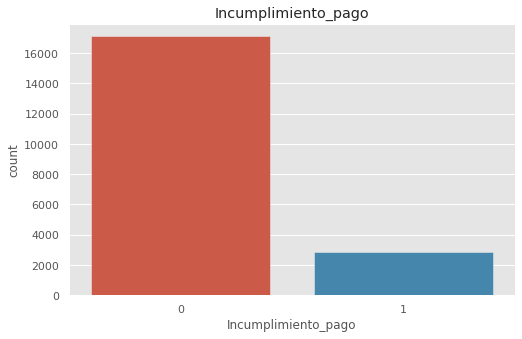

In [254]:
#recordemos el conteo de la var objetivo:
sns.countplot(x='Incumplimiento_pago', data = df)
plt.title("Incumplimiento_pago")

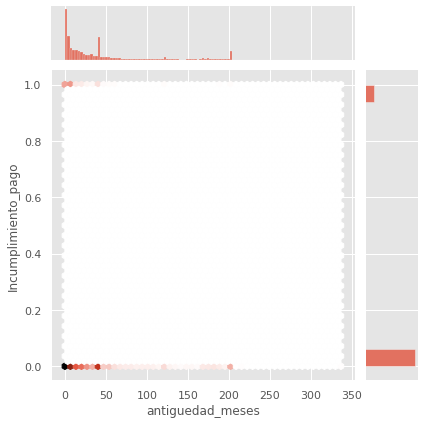

In [255]:
#Relación: Incumplimiento_pago (Y) vs antiguedad_meses(X)
sns.jointplot(df.antiguedad_meses, df.Incumplimiento_pago, kind="hex")

In [256]:
print(num_vars)

['antiguedad_meses', 'no_serv_tecnicos', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago']


In [257]:
#Y='Incumplimiento_pago' (var DEPENDIENTE)

#redefiniendo las var INDEPENDIENTES verdaderamente numericas (porque las binarias serían categóricas) y que serán insumo para el modelo:
num_vars_def=['antiguedad_meses', 'estrato'] #SOLO QUEDAN 2

In [258]:
print(new_cat_vars)

['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'portafolio', 'fallo', 'productoTO', 'productoTV', 'productoBA']


NOTA: 

Por simplicidad, las siguientes var cat no se consideran relevantes para el modelo: 
'REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'portafolio' (está correlacionada con 'productos' que tampoco se considera pues se separó en tres var cat binarias que si se van a considerar en su reemplazo)

In [259]:
#en consecuencia, redefiniendo las var verdaderamente categóricas y que serán insumo para el modelo:
cat_vars_def=['productoTO', 'productoTV', 'productoBA', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']#QUEDAN 11

Veamos la matriz de correlación entre las var numericas definitivas (covariables) y la variable objetivo:



In [260]:
num_vars_def=['antiguedad_meses', 'estrato']

In [261]:
cols=num_vars_def.copy()
cols.append('Incumplimiento_pago')
print(cols)

['antiguedad_meses', 'estrato', 'Incumplimiento_pago']


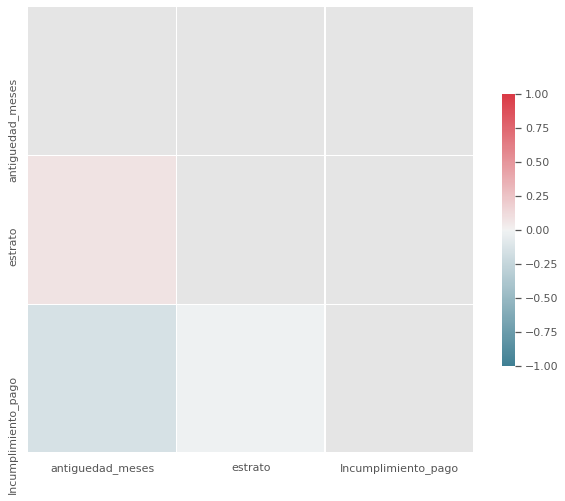

In [262]:
#Visualize the correlation matrix across all numerical features by using the sns.heatmap() command:

#compute correlation matrix

Data=df[cols].copy()

df_correlations = Data.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Construyendo el modelo predictivo: 

...iniciando con un modelo de regresión logística estándard...

Using the `LogisticRegression()` function from `scikit-learn`, let me write a function named `fit_logistic_regression(X,y)` that fits a logistic regression on the array of covariates `X` and associated response variable `y`.




In [263]:
from sklearn.linear_model import LogisticRegression
def fit_logistic_regression(X,y):
    """
    fit a logistic regression with feature matrix X and binary output y
    """
    clf = LogisticRegression(solver='lbfgs', tol=10**-4,  
                             fit_intercept=True, 
                             multi_class='multinomial').fit(X,y)
    return clf

Let me create a basic [logistic regression model](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) for predicting `Incumplimiento_pago` with only one feature: `antiguedad_meses`.  I will call this model `model1`, using a 70/30 train-test split of the data.

In [264]:
# we will use a 70%/30% split for training/validation
Data=df.copy()
n_total = len(Data)
n_train = int(0.7*n_total)

X, y = Data[["antiguedad_meses"]], Data.Incumplimiento_pago
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]

In [265]:
model1 = fit_logistic_regression(X_train, y_train)  # fit a logistic regression
y_test_pred = model1.predict_proba(X_test)[:,1]     # make probabilistic predictions on test set

Plotting the [ROC curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) of `model1` and finding the area under the curve:

In [266]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

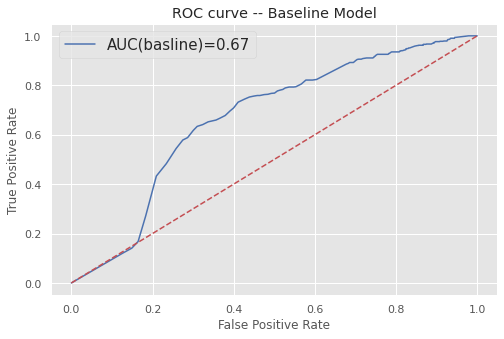

In [267]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)  #compute FPR/TPR
auc_baseline = auc(fpr, tpr) # compute AUC

plt.plot(fpr, tpr, "b-", label="AUC(basline)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- Baseline Model");

Of course this should not be the final model. This is because I have not explored the contribution from other variables, which in addition to containing valuable information could also be confounding the perceived effect of `antiguedad_meses` on the response variable `Incumplimiento_pago`. This under-exploitation of information is called [**underfitting**](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690). 

On the other hand:

Let's instead put all the variables available in the model, so that we are maximally leveraging our available info. This is also a bad idea. If we *blindly* use all of the variables in our model fitting, a phenomenon called [**overfitting**](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690) occurs. This is when a statistical model "fits" too closely to a particular set of data, which may well be noisy and exhibit randomness and therefore fail to predict future, different observations reliably.

In most cases, you will be working with datasets with many features that each have their own distribution. Generally, a large amount of time is spent on feature selection with many models being trained during this time. It is extremely rare that you simply plug all the features in and tune it once to get the optimal model. 
    
There are many different techniques associated with feature selection and a comprehensive look into all of them is outside the scope of this case. For simplicity, I will demonstrate model training and testing on single-feature models and then directly move into multi-feature models to show the numerous possible cases you may encounter. 

In reality, I would apply cross-validation on numerous subsets of features based on domain knowledge of the dataset to see which set of features truly optimizes the model I am trying to create.

[**Cross-validation**](https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f) is a set of techniques for assessing how well the results of a model will generalize to an out-of-sample dataset; i.e. in practice or production. It is chiefly used to flag overfitting.

Text(0.5, 1.0, 'CROSS VALIDATION FOLDS')

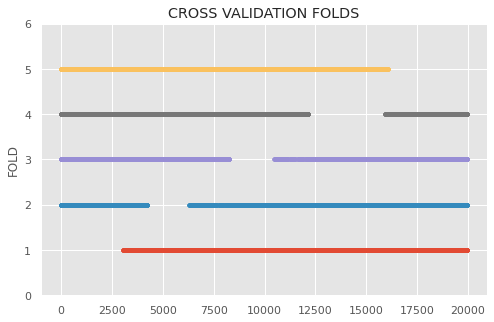

In [268]:
skf = StratifiedKFold(n_splits=5)
for k, (train_index, test_index) in enumerate( skf.split(X, y) ):
    plt.plot(train_index, [k+1 for _ in train_index], ".")
plt.ylim(0,6)
plt.ylabel("FOLD")
plt.title("CROSS VALIDATION FOLDS")

The following code defines a function `compute_AUC(X, y, train_index, test_index)` that computes the AUC of a model trained on "train_index" and tested in "test_index".

In [269]:
def compute_AUC(X, y, train_index, test_index):
    """
    feature/output: X, y
    dataset split: train_index, test_index
    """
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    clf = fit_logistic_regression(X_train, y_train)
    default_proba_test = clf.predict_proba(X_test)[:,1]  
    fpr, tpr, _ = roc_curve(y_test, default_proba_test)
    auc_score = auc(fpr, tpr)
    return auc_score, fpr, tpr

With the help of the `compute_AUC` function defined above, let me write a function `cross_validation_AUC(X,y,nfold)` that carries out a 10-fold cross-validation and returns a list which contains the area under the curve for each fold of the cross-validation:

In [270]:
def cross_validation_AUC(X,y, nfold=10):
    """
    use a n-fold cross-validation for computing AUC estimates
    """
    skf = StratifiedKFold(n_splits=nfold)  #create a cross-validation splitting
    auc_list = [] #this list will contain the AUC estimates associated with each fold
    for k, (train_index, test_index) in enumerate( skf.split(X, y) ):
        auc_score, _, _ = compute_AUC(X, y, train_index, test_index)
        auc_list.append(auc_score)
    return auc_list

I will now estimate and compare, through cross-validation analysis, the performance of all the "simple models" that only use one numerical features as input. 

In [271]:
print(num_vars_def)

['antiguedad_meses', 'estrato']


Let's compute cross-validation estimates of the AUC for each single-feature model:

In [272]:
model_perf = pd.DataFrame({}) #this data-frame will contain the AUC estimates
for key in num_vars_def:
    X_full, y_full = Data[[key]], Data.Incumplimiento_pago
    auc_list = cross_validation_AUC(X_full, y_full, nfold=10)
    model_perf["SIMPLE:" + key] = auc_list

Let me construct a [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) which shows the distribution of cross-validation scores of each variable (remember, each variable has 10 total scores): 

In [273]:
def plot_boxplot_ordered(df_model):
    """
    display a list of boxplot, ordered by the media values
    """
    df = df_model[df_model.median().sort_values().index]
    sns.boxplot(x="variable", y="value", data=pd.melt(df), showfliers=False)
    plt.xticks(rotation=90)

Text(0, 0.5, 'AUC')

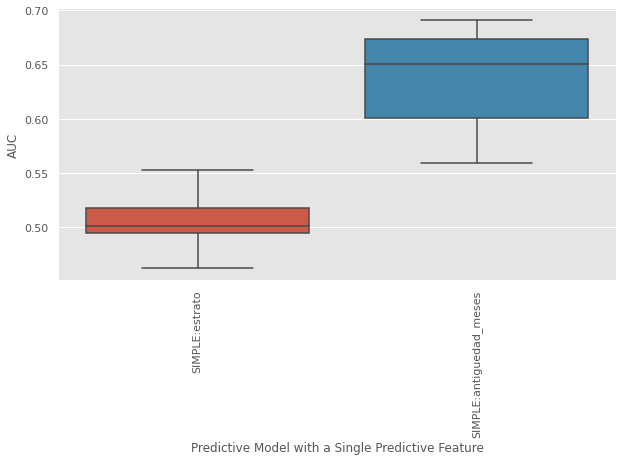

In [274]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

According to what have been done so far, from the above picture I can conclude:

- The feature that has the highest predictive power is `antiguedad_meses`
- The feature that has the lowest predictive power is `estrato`

Let me consider the model that consists of using *all* the numerical features (and none of the categorical features). Carrying out a 10-fold cross-validation analysis to determine whether this model has better predictive performance than the best single-feature model. Using the boxplot method again as I did before: 

In [275]:
X_full, y_full = Data[num_vars_def], Data.Incumplimiento_pago
auc_list = cross_validation_AUC(X_full, y_full)
model_perf["ALL_NUMERICAL"] = auc_list
model_perf

,SIMPLE:antiguedad_meses,SIMPLE:estrato,ALL_NUMERICAL
0,0.625454,0.429581,0.612515
1,0.592383,0.462943,0.580514
2,0.559453,0.495811,0.547094
3,0.674187,0.497961,0.669534
4,0.690632,0.521252,0.694829
5,0.581867,0.494196,0.575197
6,0.659101,0.552888,0.650529
7,0.671121,0.533505,0.672244
8,0.680397,0.504706,0.677434
9,0.642052,0.509290,0.644907


Text(0, 0.5, 'AUC')

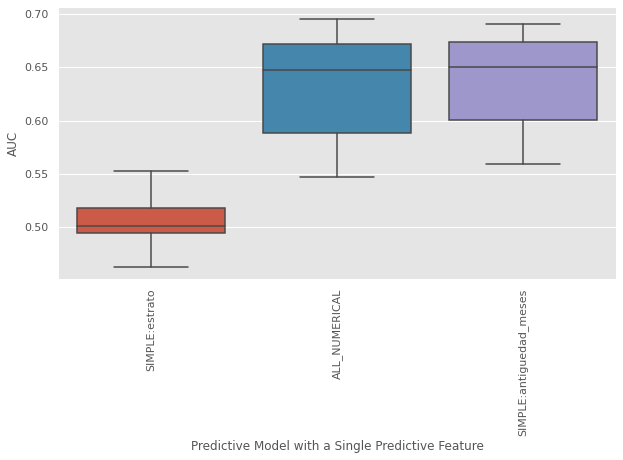

In [276]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

I see that the combined model does perform better than the best single-feature model. Thus, I will move forward with it for the rest of this case. Note, however, that best practice would entail iteratively adding features to the best single-feature model until I reach a point where there is no significant improvement, as opposed to throwing all the features in at once. Let me advise and consider to take this more cautious approach when building models (it is a matter of time)

## Incorporating categorical variables:

In [277]:
cat_vars_def # se podría decir que estas vars ya están codificadas tipo one-hot para irse añadiendo al modelo numérico anterior

['productoTO',
 'productoTV',
 'productoBA',
 'asesoria_factura',
 'pedidos_peticiones',
 'reagendamiento',
 'asesoria_servicios',
 'retencion',
 'Otras',
 'quejas_fraude',
 'traslado']

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

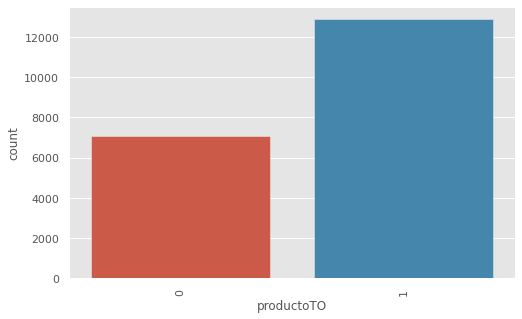

In [278]:
Data.value_counts()
sns.countplot(x='productoTO', data = Data) 
plt.xticks(rotation=90)

Let me investigate whether the categorical variable `productoTO` brings any predictive value when added to the current best model (remember again that the  encoding scheme of one-hot type is already there:

Text(0.5, 1.0, 'Incumplimiento_pago por productoTO')

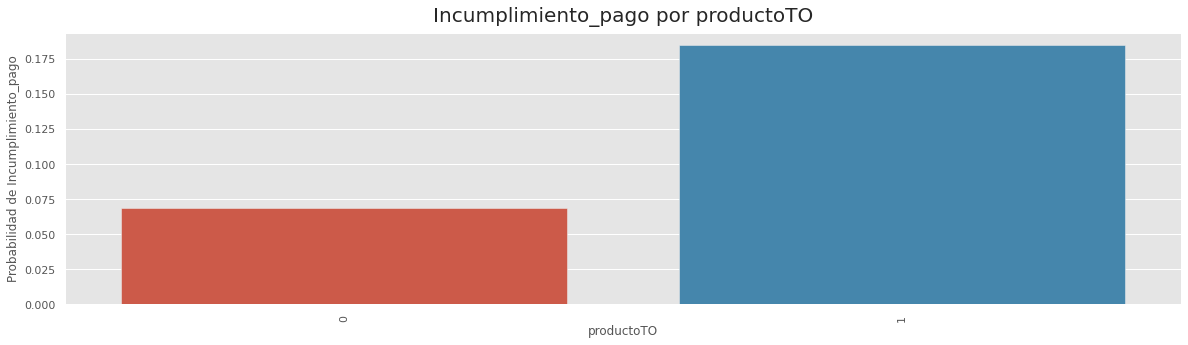

In [279]:
plt.figure(figsize= (20,5))

df_TO_incump = Data[["Incumplimiento_pago", "productoTO"]].groupby("productoTO").mean()
df_TO_incump = df_TO_incump.sort_values(by="Incumplimiento_pago",axis=0, ascending=False)
sns.barplot(x=df_TO_incump.index[:50], 
            y=df_TO_incump["Incumplimiento_pago"][:50].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de Incumplimiento_pago")
plt.title("Incumplimiento_pago por productoTO", fontsize=20, verticalalignment='bottom')

In [280]:
print(num_vars_def)

['antiguedad_meses', 'estrato']


In [281]:
new_cols=['antiguedad_meses', 'estrato','productoTO','productoTV','productoBA']

X_full_productos, y_full = Data[new_cols], Data.Incumplimiento_pago
auc_list = cross_validation_AUC(X_full_productos, y_full)
model_perf["ALL_NUMERICAL_WITH_productos"] = auc_list
model_perf

,SIMPLE:antiguedad_meses,SIMPLE:estrato,ALL_NUMERICAL,ALL_NUMERICAL_WITH_productos
0,0.625454,0.429581,0.612515,0.694596
1,0.592383,0.462943,0.580514,0.627549
2,0.559453,0.495811,0.547094,0.587298
3,0.674187,0.497961,0.669534,0.706750
4,0.690632,0.521252,0.694829,0.727204
5,0.581867,0.494196,0.575197,0.706316
6,0.659101,0.552888,0.650529,0.745785
7,0.671121,0.533505,0.672244,0.728415
8,0.680397,0.504706,0.677434,0.778226
9,0.642052,0.509290,0.644907,0.724648


Text(0, 0.5, 'AUC')

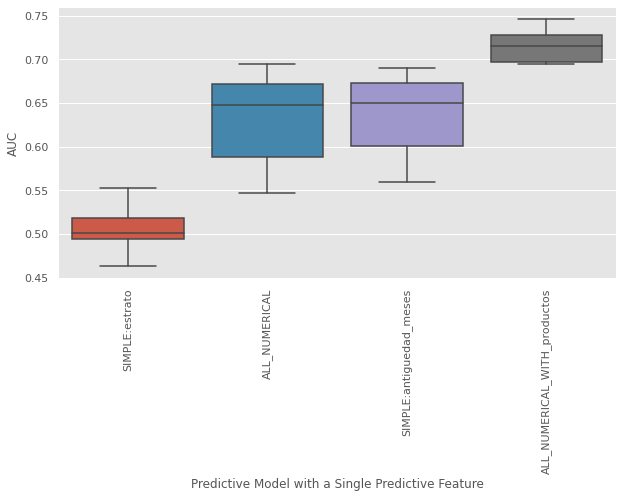

In [282]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

The difference appears significant as the boxplot for the updated model is almost completely non-overlapping with that of the previous model.

#To finish:

Let me use the rest of the "cat_vars" (they are indeed numerical: binary):

In [283]:
print(cat_vars_def)

['productoTO', 'productoTV', 'productoBA', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']


In [284]:
pqrs=['asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']

In [285]:
new_cols_def=['antiguedad_meses', 'estrato','productoTO','productoTV','productoBA', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']

X_full_productos_pqrs, y_full = Data[new_cols_def], Data.Incumplimiento_pago
auc_list = cross_validation_AUC(X_full_productos_pqrs, y_full)
model_perf["ALL_NUMERICAL_WITH_productos_pqrs"] = auc_list
model_perf

,SIMPLE:antiguedad_meses,SIMPLE:estrato,ALL_NUMERICAL,ALL_NUMERICAL_WITH_productos,ALL_NUMERICAL_WITH_productos_pqrs
0,0.625454,0.429581,0.612515,0.694596,0.695431
1,0.592383,0.462943,0.580514,0.627549,0.624117
2,0.559453,0.495811,0.547094,0.587298,0.588349
3,0.674187,0.497961,0.669534,0.706750,0.706378
4,0.690632,0.521252,0.694829,0.727204,0.722031
5,0.581867,0.494196,0.575197,0.706316,0.706624
6,0.659101,0.552888,0.650529,0.745785,0.745685
7,0.671121,0.533505,0.672244,0.728415,0.723830
8,0.680397,0.504706,0.677434,0.778226,0.781072
9,0.642052,0.509290,0.644907,0.724648,0.730572


Text(0, 0.5, 'AUC')

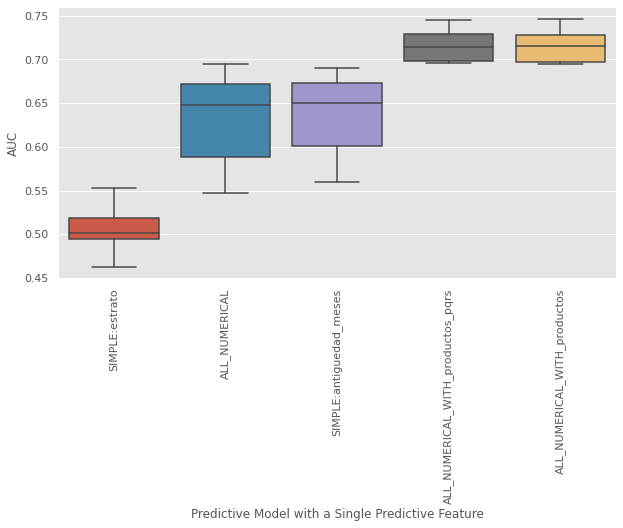

In [286]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

## Conclusions 

Once I started building models, I started with very simple logistic regressions approaches – these baseline models were useful for quickly evaluating the predictive power of each individual variable. Next, I employed cross-validation approaches for building more complex models, often exploiting the interactions between the different features. Since the dataset contains a large number of covariates, using cross-validation was revealed to be crucial for avoiding overfitting, choosing the correct number of features and ultimately choosing an appropriate model that balanced complexity with accuracy.

Cross-validation is a robust and flexible technique for evaluating the predictive performance of statistical models. It is especially useful in big data settings where the number of features is large compared to the number of observations. When used appropriately, cross-validation is a powerful method for choosing a model with the correct complexity and best predictive performance. Remember that logistic regression is only one of many classification algorithms and the principles behind cross-validation are not limited to this case alone. 

*Quiero finalmente comentar que 2 días para mi no son suficientes para terminar completa y exitosamente este caso. Con mas tiempo, seguro lo terminaría, aunque voy a seguir trabajando en el caso apesar de que el tiempo para entregarlo ya se terminó. Muchas gracias por la oprtunidad y también deseo seguir trabajando en el caso opcional donde tenía pensado trabajar con NLP (Tweets-TP)*

**Observación:**

Todo lo trabajado aquí está referenciado al *programa de Ciencia de Datos (DS4A-Colombia 3.0) ofertado por el Ministerio TIC de Colombia en convenio con la Compañía Correlation One.*

Todo el material puede ser encontrado aquí:

https://drive.google.com/drive/folders/1mGiM3lWtdkszSIrv-wpJjftZ_2qWbMNt?usp=sharing
